In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from IPython.display import Image

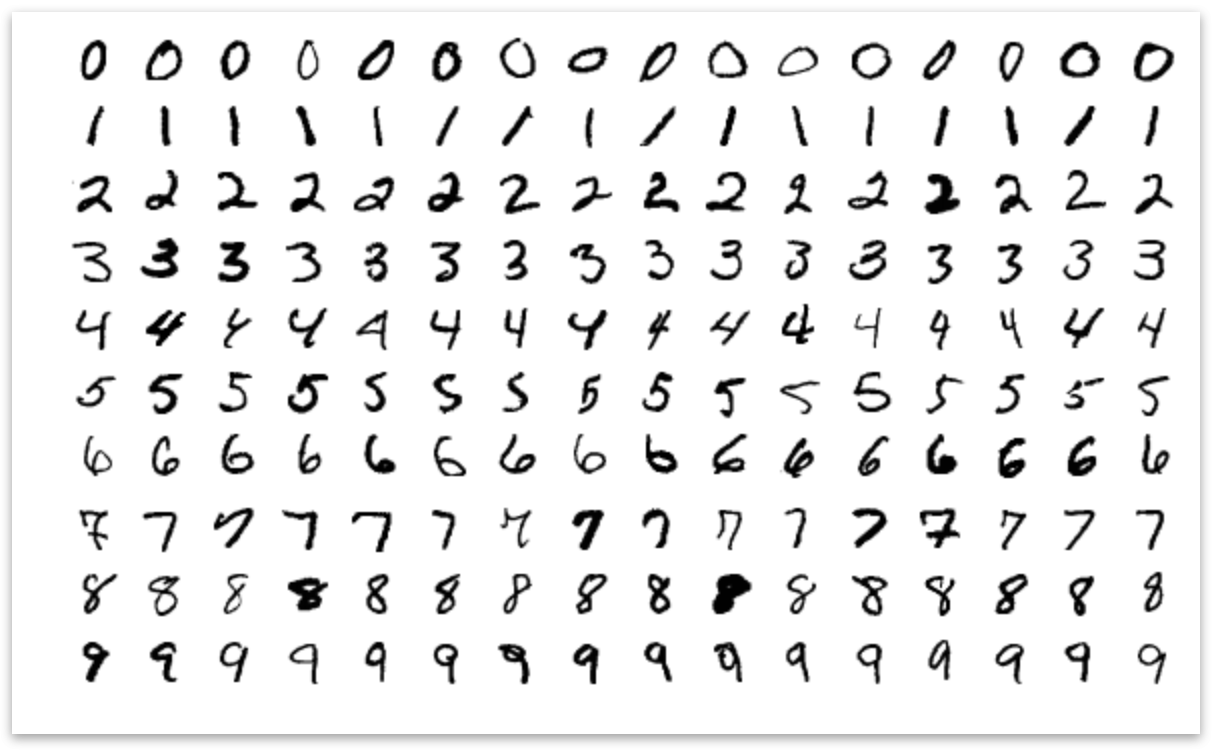

In [ ]:
# image load
Image('mnist_dataset.png')

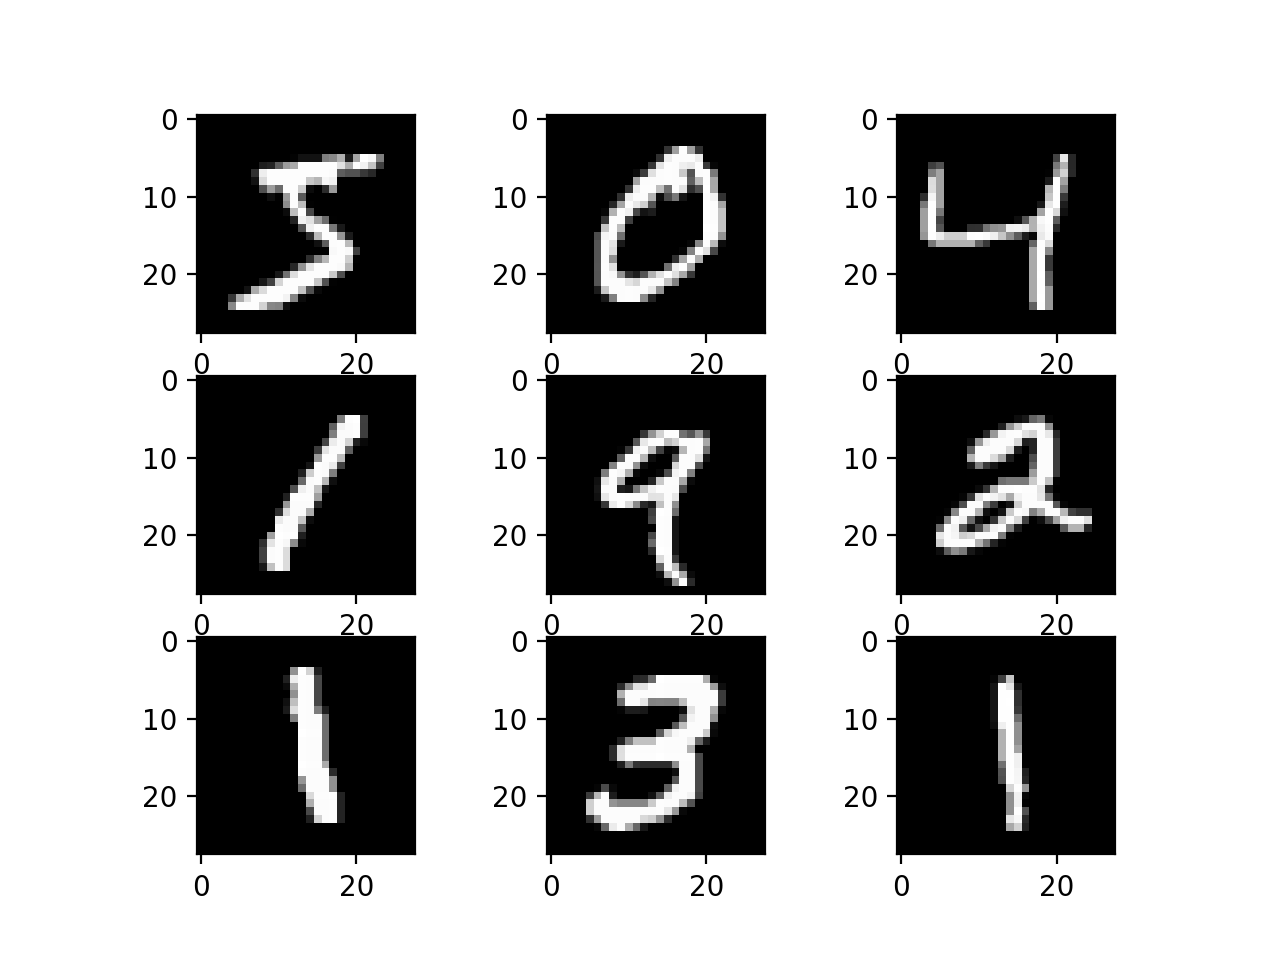

In [3]:
Image('MNIST28X28.png')

Load the dataset

In [4]:
mnist = fetch_openml("mnist_784")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# mnist.data
# mnist.target

# mnist.feature_names
# mnist.DESCR
# mnist.details
# mnist.categories
# mnist.url
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [6]:
mnist_data = pd.DataFrame(mnist.data)
mnist_data.shape

(70000, 784)

In [7]:
mnist_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x = mnist["data"] # image information
y = mnist["target"] # image ta ki bojaice
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

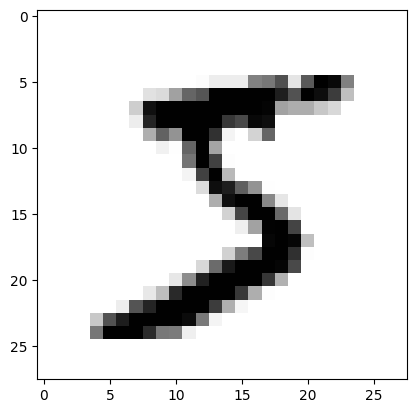

In [10]:
import matplotlib.pyplot as plt
# Assuming x.iloc[0] gives a pandas Series with your image data
some_digit = x.iloc[0]  # Access the first row (Series)
# Convert Series to a NumPy array and reshape it to a 28x28 matrix
some_digit_image = some_digit.to_numpy().reshape(28, 28)
# Now you can plot the image
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation="nearest")
plt.show()


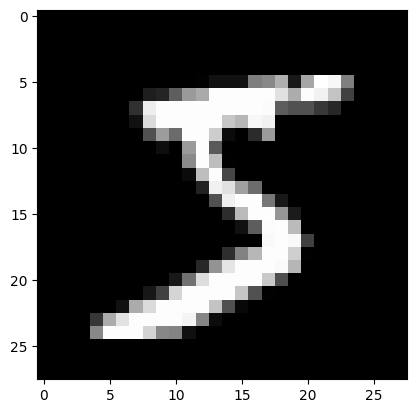

In [11]:
plt.imshow(255-some_digit_image, cmap = plt.cm.binary,interpolation="nearest")

In [12]:
some_digit_image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

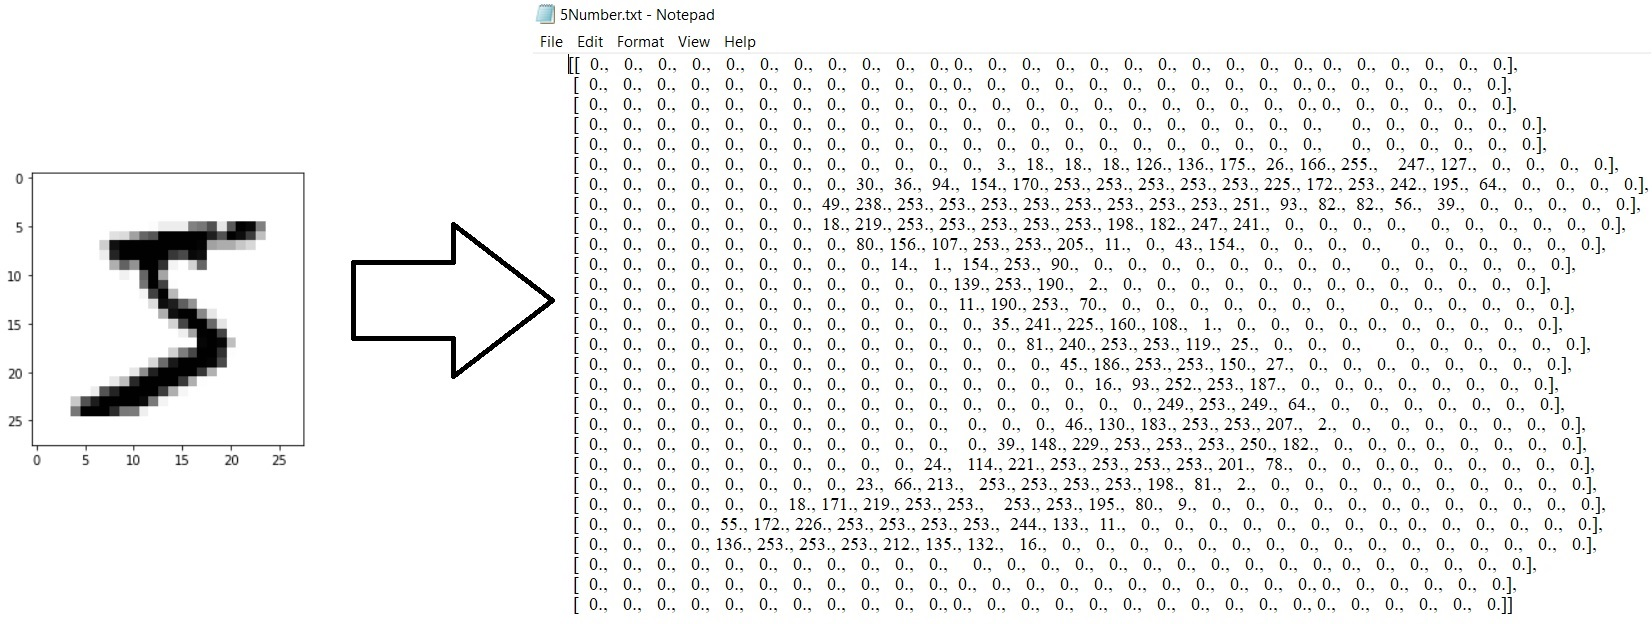

In [13]:
Image("image.png")

In [14]:
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
x.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

In [16]:
y[0]

'5'

Dataset For Train And Test

In [17]:
#MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images
xtrain, xtest, ytrain, ytest = x[:60000], x[60000:], y[:60000], y[60000:]

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [18]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [19]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


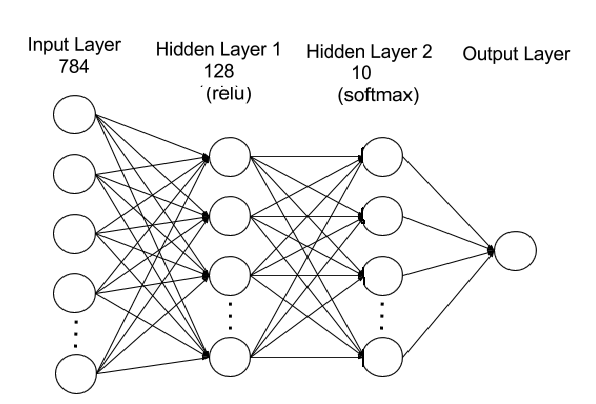

In [20]:
Image('ann_model.png')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(128,input_shape=[784],activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile The ANN Model

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
print(ytrain.dtype)
print(ytest.dtype)
import numpy as np

ytrain = np.array(ytrain, dtype=np.int32)
ytest = np.array(ytest, dtype=np.int32)


category
category


In [25]:
# Train
model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8742 - loss: 0.4381
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9648 - loss: 0.1187
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9769 - loss: 0.0751
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0585
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0426
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0321
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0255
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0193
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9947 - loss: 0.0163
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0136
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0123
Epoch 12/20
1875/1875 ━━━━━

Evaluate The Model Loss And Accuracy

In [26]:
test_loss, test_acc = model.evaluate(xtest,ytest,verbose=2)


313/313 - 1s - 3ms/step - accuracy: 0.9788 - loss: 0.1042


Predict

In [27]:
pre = model.predict(xtest)
pre[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.04660336e-10, 9.99977112e-01, 2.01557532e-06, 3.59478092e-09,
       6.13957309e-06, 1.87521595e-10, 2.35564968e-09, 3.85505427e-06,
       1.09692164e-05, 1.67172285e-08], dtype=float32)

In [28]:
np.argmax(pre[2])

np.int64(1)

In [29]:
ytest[2]

np.int32(1)

In [30]:
np.argmax(model.predict(x.iloc[[7050]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


np.int64(0)

In [31]:
y[7060]

'1'

Random Forest Classifier (By Applying Machine Learning Algorithm)

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(xtrain,ytrain)

RandomForestClassifier()

In [33]:
#Accuracy of RamdomForestClassifier Mode
clf.score(xtest,ytest)

0.9683

In [34]:
clf.predict([x.iloc[0]])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int32)

In [35]:
y[0]

'5'